In [24]:
import h2o
import pandas as pd
from h2o.automl import H2OAutoML
from h2o.estimators import H2ODeepLearningEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,9 hours 52 mins
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,2 months and 6 days
H2O_cluster_name:,H2O_from_python_unknownUser_v2fhnr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,25.57 Gb
H2O_cluster_total_cores:,30
H2O_cluster_allowed_cores:,30
H2O_cluster_status:,"locked, healthy"


# Died Data Loading

In [25]:
X = pd.read_csv('/raid-18/CHS/jakeluo/share/notebook/ataleban@uwm.edu/Panc_/X_Cleared_Balance1.5.csv')  
Y = pd.read_csv('/raid-18/CHS/jakeluo/share/notebook/ataleban@uwm.edu/Panc_/Y_Cleared_Balance1.5.csv')  

In [26]:
X = X.drop(['Unnamed: 0'], axis=1)
X['died'] = Y['0']

In [27]:
X = X.sample(frac = 1)

In [28]:
col = X.columns

In [29]:
data = h2o.H2OFrame(X)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [30]:
target = 'died'
exclude = ['aweekend','amonth','drg_nopoa','hosp_division9.0','hosp_division1.0','hosp_division2.0','hosp_division3.0','hosp_division4.0','hosp_division5.0','hosp_division6.0','hosp_division7.0','hosp_division8.0','age_neonate','elective','mdc','mdc_nopoa','tran_in','zipinc_qrtl','pclass_orproc','pay15.0','pay10.0','pay16.0','pay13.0','pay11.0','year','los','hcup_ed2.0','hcup_ed0.0','i10_npr','totchg','pay14.0','pay12.0','hcup_ed1.0','pl_nchs','i10_necause','hcup_ed3.0','hcup_ed4.0',]
features = []
for i in col:
    if i != target and i not in exclude:
        features.append(i)
        print(i)

age
race2.0
race6.0
race5.0
race4.0
race3.0
race0.0
race1.0
female
BLD001
BLD002
BLD003
BLD004
BLD005
BLD006
BLD007
BLD008
BLD009
BLD010
CIR001
CIR002
CIR003
CIR004
CIR005
CIR006
CIR007
CIR008
CIR009
CIR010
CIR011
CIR012
CIR013
CIR014
CIR015
CIR016
CIR017
CIR018
CIR019
CIR020
CIR021
CIR022
CIR023
CIR024
CIR025
CIR026
CIR027
CIR028
CIR029
CIR030
CIR031
CIR032
CIR033
CIR034
CIR035
CIR036
CIR038
CIR039
DIG001
DIG002
DIG003
DIG004
DIG005
DIG006
DIG007
DIG008
DIG009
DIG010
DIG011
DIG012
DIG013
DIG014
DIG015
DIG016
DIG017
DIG018
DIG019
DIG020
DIG021
DIG022
DIG023
DIG024
DIG025
EAR001
EAR002
EAR003
EAR004
EAR006
END001
END002
END003
END007
END008
END009
END010
END011
END012
END013
END014
END015
END016
END017
EYE001
EYE002
EYE003
EYE004
EYE005
EYE006
EYE007
EYE008
EYE009
EYE010
EYE012
FAC003
FAC004
FAC006
FAC008
FAC009
FAC014
FAC016
FAC020
FAC021
FAC022
FAC025
GEN001
GEN002
GEN003
GEN004
GEN005
GEN006
GEN007
GEN008
GEN009
GEN010
GEN012
GEN013
GEN014
GEN016
GEN017
GEN018
GEN019
GEN020
GEN021
GE

In [31]:
data[target] = data[target].asfactor()

In [32]:
#train, test = data.split_frame(ratios=[0.8])
train_ratio, valid_ratio, test_ratio = 0.7, 0.1, 0.2
# train_ratio, test_ratio = 0.7, 0.3
train, valid, test = data.split_frame(ratios=[train_ratio, valid_ratio], seed=42)

# train, test ,valid= data.split_frame(ratios=[train_ratio,valid_ratio])

In [13]:
features

['age',
 'race2.0',
 'race6.0',
 'race5.0',
 'race4.0',
 'race3.0',
 'race0.0',
 'race1.0',
 'female',
 'BLD001',
 'BLD002',
 'BLD003',
 'BLD004',
 'BLD005',
 'BLD006',
 'BLD007',
 'BLD008',
 'BLD009',
 'BLD010',
 'CIR001',
 'CIR002',
 'CIR003',
 'CIR004',
 'CIR005',
 'CIR006',
 'CIR007',
 'CIR008',
 'CIR009',
 'CIR010',
 'CIR011',
 'CIR012',
 'CIR013',
 'CIR014',
 'CIR015',
 'CIR016',
 'CIR017',
 'CIR018',
 'CIR019',
 'CIR020',
 'CIR021',
 'CIR022',
 'CIR023',
 'CIR024',
 'CIR025',
 'CIR026',
 'CIR027',
 'CIR028',
 'CIR029',
 'CIR030',
 'CIR031',
 'CIR032',
 'CIR033',
 'CIR034',
 'CIR035',
 'CIR036',
 'CIR038',
 'CIR039',
 'DIG001',
 'DIG002',
 'DIG003',
 'DIG004',
 'DIG005',
 'DIG006',
 'DIG007',
 'DIG008',
 'DIG009',
 'DIG010',
 'DIG011',
 'DIG012',
 'DIG013',
 'DIG014',
 'DIG015',
 'DIG016',
 'DIG017',
 'DIG018',
 'DIG019',
 'DIG020',
 'DIG021',
 'DIG022',
 'DIG023',
 'DIG024',
 'DIG025',
 'EAR001',
 'EAR002',
 'EAR003',
 'EAR004',
 'EAR006',
 'END001',
 'END002',
 'END003',
 'END0

# Traditional

In [30]:
clf = H2OAutoML(max_models=5, seed=42)
clf.train(x=features, y=target, training_frame=train)

AutoML progress: |
13:05:09.265: _train param, Dropping bad and constant columns: [RSP004, EYE007, EAR001, hcup_ed2.0, NEO009, PNS003, MUS004, NEO036, GIS014, END017, INF011, URN012, INJ076, ENT015, NEO051, RHB003, age_neonate, MRS004, MRS003, INF001, URN007, NEO048, MHT003, PRG028, ENT006, MHT002]

█
13:05:14.7: _train param, Dropping bad and constant columns: [RSP004, EYE007, EAR001, hcup_ed2.0, NEO009, PNS003, MUS004, NEO036, GIS014, END017, INF011, URN012, INJ076, ENT015, NEO051, RHB003, age_neonate, MRS004, MRS003, INF001, URN007, NEO048, MHT003, PRG028, ENT006, MHT002]

████
13:05:28.82: _train param, Dropping bad and constant columns: [RSP004, EYE007, EAR001, hcup_ed2.0, NEO009, PNS003, MUS004, NEO036, GIS014, END017, INF011, URN012, INJ076, ENT015, NEO051, RHB003, age_neonate, MRS004, MRS003, INF001, URN007, NEO048, MHT003, PRG028, ENT006, MHT002]

█
13:05:51.288: _train param, Dropping bad and constant columns: [RSP004, EYE007, EAR001, hcup_ed2.0, NEO009, PNS003, MUS004, NEO03

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [31]:
perf = clf.leader.model_performance(test_data=test)
print(perf)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.03905347189587536
RMSE: 0.19761951294311844
LogLoss: 0.13756448955386694
AUC: 0.9826964433349686
AUCPR: 0.9811362492301363
Gini: 0.9653928866699373
Null degrees of freedom: 3225
Residual degrees of freedom: 3220
Null deviance: 4336.310320957466
Residual deviance: 887.5660866015493
AIC: 899.5660866015493

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4938344501996043
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      1902  41    0.0211   (41.0/1943.0)
1      115   1168  0.0896   (115.0/1283.0)
Total  2017  1209  0.0484   (156.0/3226.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.493834     0.9374    137
max f2                       0.269826     0.930863  196
max f0point5                 0.674595     0.96793

# DeepLearning

In [69]:
FirstLayer = 25
SecondLayer = 50

In [124]:
def calculate_f1_score(metrics):
    actual = valid_data_h2o[response_column].as_data_frame()
    predicted = model.predict(valid_data_h2o).as_data_frame()
    f1 = f1_score(actual, predicted)
    metrics["f1_score"] = f1
checkpoint_dir = "/checkpoint"

dl = H2ODeepLearningEstimator(
                           distribution = 'bernoulli',
                           hidden=[FirstLayer,SecondLayer],
                           epochs=10,
                           train_samples_per_iteration=-1,
                           reproducible=True,
                           activation="tanh",
                            use_all_factor_levels=True,
                           single_node_mode=False,
                           balance_classes=False,
                           force_load_balance=False,
                           seed=42,
                           score_training_samples=0,
                           score_validation_samples=0,
                           stopping_rounds=0,
    score_each_iteration=True,
    loss='cross_entropy',
    standardize=True,

)

dl.train(x=features,
      y=target,
      training_frame=data
        )

weights = dl._model_json['output']
# print(weights)


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


In [125]:
scoring_history = dl.scoring_history()


In [126]:
scoring_history

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2023-07-03 13:37:55,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2023-07-03 13:38:01,6.210 sec,3099 obs/sec,1.0,1,16085.0,0.369765,0.424033,0.430308,0.879816,0.833526,2.484472,0.202549
2,,2023-07-03 13:38:06,12.023 sec,3148 obs/sec,2.0,2,32170.0,0.356927,0.399082,0.469179,0.895748,0.858336,2.500000,0.190923
3,,2023-07-03 13:38:12,17.940 sec,3147 obs/sec,3.0,3,48255.0,0.344329,0.375920,0.505989,0.908127,0.872808,2.468944,0.169537
4,,2023-07-03 13:38:18,23.920 sec,3127 obs/sec,4.0,4,64340.0,0.339997,0.367609,0.518342,0.914076,0.881593,2.468944,0.162387
5,,2023-07-03 13:38:24,29.966 sec,3107 obs/sec,5.0,5,80425.0,0.329089,0.347883,0.548750,0.922406,0.891521,2.468944,0.152502
6,,2023-07-03 13:38:30,35.674 sec,3128 obs/sec,6.0,6,96510.0,0.322236,0.334634,0.567350,0.928577,0.900027,2.484472,0.143612
7,,2023-07-03 13:38:36,41.392 sec,3144 obs/sec,7.0,7,112595.0,0.313009,0.321419,0.591772,0.936127,0.910675,2.500000,0.132732
8,,2023-07-03 13:38:42,47.188 sec,3149 obs/sec,8.0,8,128680.0,0.308428,0.310110,0.603634,0.938395,0.912585,2.484472,0.130619
9,,2023-07-03 13:38:47,53.407 sec,3147 obs/sec,9.0,9,144765.0,0.299653,0.296592,0.625867,0.945197,0.921591,2.500000,0.120609


### Creating TensorFlow model Based on H2O

In [25]:
weight_keys = dl._model_json['output']['weights']

# get the weight values as numpy arrays
weights = []
for key in weight_keys:
    weight_frame = h2o.get_frame(key['name'])
    weight_df = weight_frame.as_data_frame()
    weight_values = weight_df.values
    print(weight_values.shape)
    weights.append(weight_values)


(25, 608)
(50, 25)
(2, 50)


In [26]:
norm = dl._model_json['output']['normmul']

biases_keys = dl._model_json['output']['biases']

# get the weight values as numpy arrays
biases = []
for key in biases_keys:
    biases_frame = h2o.get_frame(key['name'])
    biases_df = biases_frame.as_data_frame()
    biases_values = biases_df.values
    print(biases_values.shape)
    biases.append(biases_values)


(25, 1)
(50, 1)
(2, 1)


In [27]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(608,)),
    tf.keras.layers.Dense(units=FirstLayer, activation='tanh',
                          ),
    tf.keras.layers.Dense(units=SecondLayer, activation='tanh',
                          ),
    tf.keras.layers.Dense(units=1, activation='linear',
                          )
])

# Compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [28]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(608,)),
    tf.keras.layers.Dense(units=FirstLayer, activation='tanh',
                          ),
    tf.keras.layers.Dense(units=SecondLayer, activation='tanh',
                          ),
    tf.keras.layers.Dense(units=2, activation='softmax',
                          )
])

# Compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [29]:
import numpy as np
for i in range(len(weights)):
    l = np.reshape(biases[i], (biases[i].shape[0],))
    model.layers[i].set_weights([weights[i].T, l])
    print(i)


0
1
2


In [30]:
trainTensor = train.as_data_frame()
validTensor = valid.as_data_frame()
testTensor  = test.as_data_frame()
trainTensorY = pd.get_dummies(pd.get_dummies(trainTensor[target]))
trainTensor = trainTensor[dl._model_json['output']['names']].iloc[::,:-1]*norm
validTensorY = pd.get_dummies(pd.get_dummies(validTensor[target]))
validTensor = validTensor[dl._model_json['output']['names']].iloc[::,:-1]*norm
testTensorY = pd.get_dummies(pd.get_dummies(testTensor[target]))
testTensor = testTensor[dl._model_json['output']['names']].iloc[::,:-1]*norm

## All In ONE

In [38]:
FirstLayer = 25
SecondLayer = 50
epoch = 10
for FirstLayer in [10,25,50,100]:
    for SecondLayer in [10,25,50,100]:
        for epoch in [25,50,100]:
            dl = H2ODeepLearningEstimator(
                                       distribution = 'bernoulli',
                                       hidden=[FirstLayer,SecondLayer],
                                       epochs=epoch,
                                       train_samples_per_iteration=-1,
                                       reproducible=True,
                                       activation="tanh",
                                       single_node_mode=False,
                                       balance_classes=False,
                                       force_load_balance=False,
                                       seed=42,
                                       score_training_samples=0,
                                       score_validation_samples=0,
                                        nfolds=5,
                                       stopping_rounds=0,
                loss='cross_entropy',
                standardize=True,
                export_weights_and_biases = True)

            dl.train(x=features,
                      y=target,
                      training_frame=data
                     ,
                    validation_frame=test)

            weights = dl._model_json['output']
            # print(weights)

            weight_keys = dl._model_json['output']['weights']

            # get the weight values as numpy arrays
            weights = []
            for key in weight_keys:
                weight_frame = h2o.get_frame(key['name'])
                weight_df = weight_frame.as_data_frame()
                weight_values = weight_df.values
                # print(weight_values.shape)
                weights.append(weight_values)


            norm = dl._model_json['output']['normmul']

            biases_keys = dl._model_json['output']['biases']

            # get the weight values as numpy arrays
            biases = []
            for key in biases_keys:
                biases_frame = h2o.get_frame(key['name'])
                biases_df = biases_frame.as_data_frame()
                biases_values = biases_df.values
                # print(biases_values.shape)
                biases.append(biases_values)

            import tensorflow as tf

            # Define the model architecture
            model = tf.keras.models.Sequential([
                tf.keras.layers.InputLayer(input_shape=(608,)),
                tf.keras.layers.Dense(units=FirstLayer, activation='tanh',
                                      ),
                tf.keras.layers.Dense(units=SecondLayer, activation='tanh',
                                      ),
                tf.keras.layers.Dense(units=1, activation='linear',
                                      )
            ])

            # Compile the model
            optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


            import tensorflow as tf

            # Define the model architecture
            model = tf.keras.models.Sequential([
                tf.keras.layers.InputLayer(input_shape=(608,)),
                tf.keras.layers.Dense(units=FirstLayer, activation='tanh',
                                      ),
                tf.keras.layers.Dense(units=SecondLayer, activation='tanh',
                                      ),
                tf.keras.layers.Dense(units=2, activation='softmax',
                                      )
            ])

            # Compile the model
            optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


            import numpy as np
            for i in range(len(weights)):
                l = np.reshape(biases[i], (biases[i].shape[0],))
                model.layers[i].set_weights([weights[i].T, l])
                # print(i)

            trainTensor = train.as_data_frame()
            validTensor = valid.as_data_frame()
            testTensor  = test.as_data_frame()
            trainTensorY = pd.get_dummies(pd.get_dummies(trainTensor[target]))
            trainTensor = trainTensor[dl._model_json['output']['names']].iloc[::,:-1]*norm
            validTensorY = pd.get_dummies(pd.get_dummies(validTensor[target]))
            validTensor = validTensor[dl._model_json['output']['names']].iloc[::,:-1]*norm
            testTensorY = pd.get_dummies(pd.get_dummies(testTensor[target]))
            testTensor = testTensor[dl._model_json['output']['names']].iloc[::,:-1]*norm
            optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)

            model.fit(trainTensor, trainTensorY, epochs=1,verbose=2, validation_data=(validTensor, validTensorY))

            import pickle as pkl 
            metaData_Dictionary = {}
            metaData_Dictionary['norm'] =  norm
            metaData_Dictionary['Features'] =  dl._model_json['output']['names']
            with open('Hidden'+str(FirstLayer)+'_'+str(SecondLayer)+'Epoch'+str(epoch)+'.pkl', 'wb') as file:
                pkl.dump(metaData_Dictionary, file)

            model.save('Hidden'+str(FirstLayer)+'_'+str(SecondLayer)+'Epoch'+str(epoch)+'.hdf5')
            import h2o
            import pandas as pd

            # Assuming you have an H2O model named 'model'

            # Get the scoring history from the model
            scoring_history = dl.scoring_history()

            # Extract the training and validation logloss
            training_logloss = scoring_history['training_logloss']
            validation_logloss = scoring_history['validation_logloss']

            # Create a DataFrame to store the logloss values
            logloss_df = pd.DataFrame({'Training Logloss': training_logloss, 'Validation Logloss': validation_logloss})

            # Save the logloss values to a CSV file
            logloss_df.to_csv('Hidden'+str(FirstLayer)+'_'+str(SecondLayer)+'Epoch'+str(epoch)+'model'+'.csv', index=False)
            
            training_auc = scoring_history['training_auc']
            validation_auc = scoring_history['validation_auc']

            # Create a DataFrame to store the AUC values
            auc_df = pd.DataFrame({'Training AUC': training_auc, 'Validation AUC': validation_auc})

            # Save the AUC values to a CSV file
            auc_df.to_csv('Hidden' + str(FirstLayer) + '_' + str(SecondLayer) +'Epoch'+str(epoch)+ '_AUC.csv', index=False)
            import matplotlib.pyplot as plt

            # Create a new figure
            # plt.figure()

            # Generate the plot using dl.plot()
            # dl.plot()

            # Save the plot with high resolution
            # plt.savefig('LearningRate'+'Hidden'+str(FirstLayer)+'_'+str(SecondLayer)+'Epoch'+str(epoch)+'model'+'.png', dpi=300)


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4424 - accuracy: 0.8045 - val_loss: 0.3932 - val_accuracy: 0.8300 - 836ms/epoch - 2ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4668 - accuracy: 0.7987 - val_loss: 0.4012 - val_accuracy: 0.8288 - 959ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4973 - accuracy: 0.7925 - val_loss: 0.3971 - val_accuracy: 0.8405 - 804ms/epoch - 2ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4715 - accuracy: 0.7927 - val_loss: 0.3817 - val_accuracy: 0.8282 - 777ms/epoch - 2ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.5608 - accuracy: 0.7600 - val_loss: 0.4826 - val_accuracy: 0.7960 - 801ms/epoch - 2ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.6017 - accuracy: 0.7570 - val_loss: 0.5092 - val_accuracy: 0.7886 - 809ms/epoch - 2ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4726 - accuracy: 0.7859 - val_loss: 0.4216 - val_accuracy: 0.8183 - 897ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.5198 - accuracy: 0.7750 - val_loss: 0.4425 - val_accuracy: 0.8164 - 803ms/epoch - 2ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.5676 - accuracy: 0.7680 - val_loss: 0.5441 - val_accuracy: 0.7608 - 858ms/epoch - 2ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4190 - accuracy: 0.8172 - val_loss: 0.3491 - val_accuracy: 0.8578 - 794ms/epoch - 2ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4716 - accuracy: 0.7998 - val_loss: 0.3689 - val_accuracy: 0.8548 - 833ms/epoch - 2ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.5433 - accuracy: 0.7930 - val_loss: 0.4543 - val_accuracy: 0.8183 - 905ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.3973 - accuracy: 0.8257 - val_loss: 0.3082 - val_accuracy: 0.8733 - 931ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4769 - accuracy: 0.8209 - val_loss: 0.2769 - val_accuracy: 0.8832 - 1s/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.6889 - accuracy: 0.8042 - val_loss: 0.4042 - val_accuracy: 0.8603 - 957ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.3840 - accuracy: 0.8395 - val_loss: 0.3133 - val_accuracy: 0.8702 - 954ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.5012 - accuracy: 0.8291 - val_loss: 0.2780 - val_accuracy: 0.8925 - 875ms/epoch - 2ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.7697 - accuracy: 0.8030 - val_loss: 0.5266 - val_accuracy: 0.8511 - 895ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4536 - accuracy: 0.8105 - val_loss: 0.3037 - val_accuracy: 0.8727 - 840ms/epoch - 2ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.6046 - accuracy: 0.8052 - val_loss: 0.3142 - val_accuracy: 0.8764 - 899ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.9439 - accuracy: 0.7783 - val_loss: 0.5284 - val_accuracy: 0.8684 - 922ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4435 - accuracy: 0.8121 - val_loss: 0.3150 - val_accuracy: 0.8764 - 968ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4416 - accuracy: 0.8453 - val_loss: 0.2126 - val_accuracy: 0.9209 - 979ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.6587 - accuracy: 0.8330 - val_loss: 0.1881 - val_accuracy: 0.9425 - 1s/epoch - 4ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.3850 - accuracy: 0.8414 - val_loss: 0.2464 - val_accuracy: 0.8993 - 1s/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4652 - accuracy: 0.8594 - val_loss: 0.1616 - val_accuracy: 0.9413 - 1s/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 1.0603 - accuracy: 0.7879 - val_loss: 0.5756 - val_accuracy: 0.8603 - 988ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.3112 - accuracy: 0.8762 - val_loss: 0.1857 - val_accuracy: 0.9240 - 932ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.3809 - accuracy: 0.8780 - val_loss: 0.1509 - val_accuracy: 0.9431 - 995ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.6233 - accuracy: 0.8601 - val_loss: 0.2474 - val_accuracy: 0.9388 - 1s/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.3484 - accuracy: 0.8665 - val_loss: 0.1778 - val_accuracy: 0.9283 - 1s/epoch - 4ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.5253 - accuracy: 0.8513 - val_loss: 0.1851 - val_accuracy: 0.9302 - 977ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.8441 - accuracy: 0.8286 - val_loss: 0.3995 - val_accuracy: 0.9036 - 1s/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.3577 - accuracy: 0.8640 - val_loss: 0.1694 - val_accuracy: 0.9333 - 1s/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.5226 - accuracy: 0.8620 - val_loss: 0.1513 - val_accuracy: 0.9475 - 893ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.7531 - accuracy: 0.8581 - val_loss: 0.2198 - val_accuracy: 0.9444 - 992ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.3917 - accuracy: 0.8513 - val_loss: 0.3324 - val_accuracy: 0.8739 - 1s/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4907 - accuracy: 0.8564 - val_loss: 0.2618 - val_accuracy: 0.9067 - 1s/epoch - 4ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.7707 - accuracy: 0.8375 - val_loss: 0.5449 - val_accuracy: 0.8739 - 1s/epoch - 4ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4261 - accuracy: 0.8554 - val_loss: 0.2910 - val_accuracy: 0.8900 - 1s/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.6351 - accuracy: 0.8341 - val_loss: 0.4049 - val_accuracy: 0.8795 - 948ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.9022 - accuracy: 0.8358 - val_loss: 0.5132 - val_accuracy: 0.8857 - 947ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.3042 - accuracy: 0.8914 - val_loss: 0.1151 - val_accuracy: 0.9555 - 1s/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4257 - accuracy: 0.8897 - val_loss: 0.1147 - val_accuracy: 0.9580 - 1s/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.3757 - accuracy: 0.9157 - val_loss: 0.1190 - val_accuracy: 0.9679 - 1s/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.3354 - accuracy: 0.8818 - val_loss: 0.1632 - val_accuracy: 0.9382 - 910ms/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.4330 - accuracy: 0.8884 - val_loss: 0.1527 - val_accuracy: 0.9518 - 1s/epoch - 3ms/step
deeplearning Model Build progress: |

/raid-18/CHS/jakeluo/envs/Amirsajjad/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [RSP004, EAR001, RHB003, PNS003, GIS014, END017, INF011, URN012, URN007, NEO048, MHT003, PRG028, ENT015, MHT002, NEO051]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
354/354 - 1s - loss: 0.5201 - accuracy: 0.8917 - val_loss: 0.2491 - val_accuracy: 0.9382 - 985ms/epoch - 3ms/step


# Regression : 

In [49]:
trainTensor = train.as_data_frame()
validTensor = valid.as_data_frame()
testTensor  = test.as_data_frame()
trainTensorY = trainTensor[target]
trainTensor = trainTensor[dl._model_json['output']['names']].iloc[::,:-1]*norm
validTensorY = validTensor[target]
validTensor = validTensor[dl._model_json['output']['names']].iloc[::,:-1]*norm
testTensorY = testTensor[target]
testTensor = testTensor[dl._model_json['output']['names']].iloc[::,:-1]*norm

In [72]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)


model.fit(trainTensor, trainTensorY, epochs=2,verbose=2, validation_data=(validTensor, validTensorY))

# Evaluate your model
test_loss, test_acc = model.evaluate(testTensor, testTensorY, verbose=2)
print('Test accuracy:', test_acc)

Epoch 1/2
350/350 - 1s - loss: 0.3337 - accuracy: 0.8572 - val_loss: 0.2413 - val_accuracy: 0.9016
Epoch 2/2
350/350 - 0s - loss: 0.2246 - accuracy: 0.9125 - val_loss: 0.2145 - val_accuracy: 0.9168
102/102 - 0s - loss: 0.2265 - accuracy: 0.9103
Test accuracy: 0.9103193879127502


In [89]:
test_loss, test_acc = model.evaluate(testTensor, testTensorY, verbose=2)
print('Test accuracy:', test_acc)

102/102 - 0s - loss: 0.2265 - accuracy: 0.9103
Test accuracy: 0.9103193879127502


In [ ]:
train, valid, test

### Test The H2O model vs TensorFlow

In [74]:
Which = 1
for Which in range(0,100):
    XforH2o = data[dl._model_json['output']['names']][Which,:-1]
    pred = dl.predict(XforH2o)
    x = data[dl._model_json['output']['names']][Which,:-1].as_data_frame()
    #print(x)
    x = pd.DataFrame(x.values[0]*norm).T
    #print(x.T)\
    y = data[dl._model_json['output']['names']][Which,-1]
    y_pred = model.predict(x)
    print(y_pred)
    #print(pred[['p0']])
    y_pred_class = np.argmax(y_pred)
    print('H20 pred',pred['predict'].as_data_frame().values[0],'tensor_pred',y_pred_class,'y',y)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
[[0.9972378  0.00276219]]
H20 pred [0] tensor_pred 0 y 0
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
[[0.13082215 0.8691778 ]]
H20 pred [1] tensor_pred 1 y 0
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
[[0.92598075 0.07401925]]
H20 pred [0] tensor_pred 0 y 0
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
[[0.7457433  0.25425673]]
H20 pred [0] tensor_pred 0 y 0
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
[[0.9150704  0.08492957]]
H20 pred [0] tensor_pred 0 y 0
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
[[0.97998327 0.02001668]]
H20 pred [0] tensor_pred 0 y 0
deeplearning prediction progress: |██████████████████████████████████████████████| (done

# Saving the Meta-Data and HDF5

In [31]:
import pickle as pkl 
metaData_Dictionary = {}
metaData_Dictionary['norm'] =  norm
metaData_Dictionary['Features'] =  dl._model_json['output']['names']
with open('Hidden'+str(FirstLayer)+'_'+str(SecondLayer)+'Epoch'+'10'+'.pkl', 'wb') as file:
    pkl.dump(metaData_Dictionary, file)

In [32]:
# with open('metaData.pkl', 'rb') as file:
#     myvar = pkl.load(file)
#     print(myvar)

In [33]:
model.save('Hidden'+str(FirstLayer)+'_'+str(SecondLayer)+'Epoch'+'10'+'.hdf5')

### Valdation VS. Training Epoch

In [24]:
import h2o
import pandas as pd

# Assuming you have an H2O model named 'model'

# Get the scoring history from the model
scoring_history = dl.scoring_history()

# Extract the training and validation logloss
training_logloss = scoring_history['training_logloss']
validation_logloss = scoring_history['validation_logloss']

# Create a DataFrame to store the logloss values
logloss_df = pd.DataFrame({'Training Logloss': training_logloss, 'Validation Logloss': validation_logloss})

# Save the logloss values to a CSV file
logloss_df.to_csv('logloss.csv', index=False)


<Figure size 432x288 with 0 Axes>

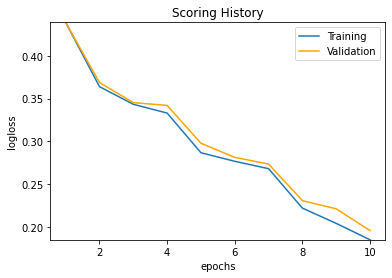

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure()

# Generate the plot using dl.plot()
dl.plot()

# Save the plot with high resolution
plt.savefig('LearningRate.png', dpi=300)


### Feature Importance

In [271]:
feat_imp = dl.varimp(use_pandas=True)
print(feat_imp.head(30))
feat_imp.to_csv('Died_Fet_importance.csv')

   variable  relative_importance  scaled_importance  percentage
0    CIR018             1.000000           1.000000    0.006301
1    ESA005             0.752320           0.752320    0.004741
2    GEN002             0.719683           0.719683    0.004535
3    INF002             0.623220           0.623220    0.003927
4    SYM003             0.617477           0.617477    0.003891
5    NVS020             0.594421           0.594421    0.003746
6    NEO070             0.567286           0.567286    0.003575
7    DIG018             0.550291           0.550291    0.003468
8    CIR007             0.504869           0.504869    0.003181
9    ESA004             0.481697           0.481697    0.003035
10   RSP010             0.474172           0.474172    0.002988
11   END011             0.467395           0.467395    0.002945
12   HEP005             0.459627           0.459627    0.002896
13   HEP008             0.459507           0.459507    0.002896
14   ADM006             0.454762        

### Name Of Features

In [66]:
tesi = data[dl._model_json['output']['names']][Which,:-1]
#data[dl._model_json['output']['names']][Which,:-1]

In [67]:
print(tesi)

  age    race2.0    race6.0    race5.0    race4.0    race3.0    race0.0    race1.0    female    BLD001    BLD002    BLD003    BLD004    BLD005    BLD006    BLD007    BLD008    BLD009    BLD010    CIR001    CIR002    CIR003    CIR004    CIR005    CIR006    CIR007    CIR008    CIR009    CIR010    CIR011    CIR012    CIR013    CIR014    CIR015    CIR016    CIR017    CIR018    CIR019    CIR020    CIR021    CIR022    CIR023    CIR024    CIR025    CIR026    CIR027    CIR028    CIR029    CIR030    CIR031    CIR032    CIR033    CIR034    CIR035    CIR036    CIR038    CIR039    DIG001    DIG002    DIG003    DIG004    DIG005    DIG006    DIG007    DIG008    DIG009    DIG010    DIG011    DIG012    DIG013    DIG014    DIG015    DIG016    DIG017    DIG018    DIG019    DIG020    DIG021    DIG022    DIG023    DIG024    DIG025    EAR002    EAR003    EAR004    EAR006    END001    END002    END003    END007    END008    END009    END010    END011    END012    END013    END014    END015    END016    EYE0

### Performance On Test Data

In [114]:
perf = dl.model_performance(test)
perf

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.08257808201709212
RMSE: 0.2873640235260707
LogLoss: 0.27580436001178554
Mean Per-Class Error: 0.112748505811638
AUC: 0.952339129381051
AUCPR: 0.9319101463820745
Gini: 0.9046782587621021

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4721037834872541
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      2602  272   0.0946   (272.0/2874.0)
1      257   1707  0.1309   (257.0/1964.0)
Total  2859  1979  0.1093   (529.0/4838.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.472104     0.865838  200
max f2                       0.25274      0.899144  268
max f0point5                 0.666024     0.884714  144
max accuracy                 0.546776     0.891484  178
max precision                0.995146     1         0
max recall                   0.00941984   1         393
max specificity              0.995146     1         0
max absolute_mcc             0.518332     0.774145  187
max min_per_class_accuracy   0.424421     0.882892  215
max mean_per_class_accuracy  0.472104     0.887251  200
max tns                      0.995146     2874      0
max fns                      0.995146     1961      0
max fps                      0.00302859   2874      399
max tps                      0.00941984   1964      393
max tnr                      0.995146     1         0
max fnr                      0.995146     0.998473  0
max fpr                      0.00302859   1         399
max tpr                      0.00941984   1         393

Gains/Lift Table: Avg response rate: 40.60 %, avg score: 40.99 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101282                   0.987888           2.46334     2.46334            1                0.989547    1                           0.989547            0.0249491       0.0249491                  146.334   146.334            0.0249491
2        0.0200496                   0.986777           2.41202     2.43794            0.979167         0.98733     0.989691                    0.98845             0.0239308       0.0488798                  141.202   143.794            0.0485319
3        0.0301778                   0.985274           2.41307     2.4296             0.979592         0.986107    0.986301                    0.987664            0.0244399       0.0733198                  141.307   142.96             0.0726239
4        0.0400992                   0.983489           2.46334     2.43794            1                0.984405    0.989691                    0.986857            0.0244399       0.0977597                  146.334   143.794            0.0970638
5        0.0500207                   0.981312           2.41202     2.4328             0.979167         0.98238     0.987603                    0.985969            0.0239308       0.12169                    141.202   143.28             0.120647
6        0.100041                    0.963234           2.39209     2.41244            0.971074         0.972969    0.979339                    0.979469            0.119654        0.241344                   139.209   141.244            0.237865
7        0.150062                    0.938623           2.37173     2.39887            0.96281          0.950672    0.973829                    0.96987             0.118635        0.35998                    137.173   139.887            0

In [58]:
import plotly.graph_objs as go

# Assuming that `perf` contains the model performance metrics
auc = perf.auc()
fprs,tprs = perf.roc()

# Create a Scatter trace with x=fprs, y=tprs, and show the AUC in the hover text
trace = go.Scatter(
    x=fprs,
    y=tprs,
    mode="lines",
    hovertemplate="False Positive Rate: %{x:.2f}<br>True Positive Rate: %{y:.2f}<br>AUC: %{text:.3f}",
    text=[auc]*len(fprs)
)

# Create the layout for the plot
layout = go.Layout(
    title="ROC Curve",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate"
)

# Create a Figure object and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)
fig.write_html("roc_curve.html")

# Display the plot
#fig.show()


In [59]:
perf.auc()

0.9790658046703884

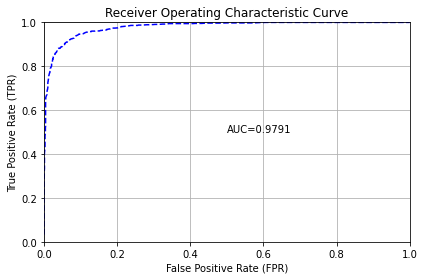

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0005141388174807198,
  0.0005141388174807198,
  0.0005141388174807198,
  0.0010282776349614395,
  0.0010282776349614395,
  0.0010282776349614395,
  0.0010282776349614395,
  0.0010282776349614395,
  0.0010282776349614395,
  0.0010282776349614395,
  0.0010282776349614395,
  0.0015424164524421595,
  0.002056555269922879,
  0.002570694087403599,
  0.002570694087403599,
  0.002570694087403599,
  0.002570694087403599,
  0.002570694087403599,
  0.002570694087403599,
  0.002570694087403599,
  0.002570694087403599,
  0.002570694087403599,
  0.003084832904884319,
  0.003084832904884319,
  0.0035989717223650387,
  0.0035989717223650387,
  0.0035989717223650387,
  0.0035989717223650387,
  0.004113110539845758,
  0.004113110539845758,
  0.004113110539845758,
  0.004113110539845758,
  0.004113110539845758,
  0.004113110539845758,
  0.004113110539845758,
  0.004113110539845758,
  0.004113110539845758

In [60]:
perf.plot()

### Model Explanation

In [2]:
leader_model = dl
explanation = leader_model.explain(test)
print(explanation)

NameError: name 'dl' is not defined

### Model Summery

In [47]:
summary = dl.summary()
print(summary.as_data_frame())

     layer  units    type dropout   l1   l2 mean_rate  rate_rms momentum  \
0        1    608   Input     0.0                                          
1        2     50    Tanh     0.0  0.0  0.0  0.048598  0.068596      0.0   
2        3     50    Tanh     0.0  0.0  0.0  0.016867  0.034805      0.0   
3        4      1  Linear          0.0  0.0  0.000315  0.000093      0.0   

  mean_weight weight_rms mean_bias  bias_rms  
0                                             
1   -0.004561   0.111666  0.002829  0.154115  
2    0.009713   0.201611 -0.107674  0.380264  
3    0.077396   0.270082  0.433407       0.0  


In [48]:
dl

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1684112569648_7


Status of Neuron Layers: predicting died, regression, tweedie distribution, Automatic loss, 33,051 weights/biases, 492.5 KB, 160,850 training samples, mini-batch size 1
    layer    units    type    dropout    l1    l2    mean_rate               rate_rms               momentum    mean_weight            weight_rms           mean_bias             bias_rms
--  -------  -------  ------  ---------  ----  ----  ----------------------  ---------------------  ----------  ---------------------  -------------------  --------------------  -----------------------
    1        608      Input   0.0
    2        50       Tanh    0.0        0.0   0.0   0.04859755996400508     0.06859582662582397    0.0         -0.004561034837546376  0.11166572570800781  0.00282871958451425   0.15411514043807983
    3        50       Tanh    0.0        0.0   0.0   0.0168667189411819      0.03480544686317444    0.0         0.009713222266291267   0.2016114592552185   -0.10767395355013538  0.3802640438079834
    4        1        Linear             0.0   0.0   0.00031452912866370753  9.250076254829764e-05  0.0         0.07739621295942925    0.27008187770843506  0.43340676828323865   1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.1318906315771173
RMSE: 0.3631674979635668
MAE: 0.24957397881277027
RMSLE: 0.2391310738918054
Mean Residual Deviance: 1.146853603868233

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.14326793567130822
RMSE: 0.3785075107198115
MAE: 0.253226398777981
RMSLE: 0.241239172235864
Mean Residual Deviance: 1.159262350563437

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2    validation_rmse    validation_deviance    validation_mae    validation_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------  -----------------  ---------------------  ----------------  ---------------
    2023-05-14 20:24:57  0.000 sec                           0         0             0          nan              nan                  nan             nan            nan                nan                    nan               nan
    2023-05-14 20:25:18  21.732 sec        787 obs/sec       1         1             16085      0.390109         1.38667              0.303783        0.365895       0.390411           1.37738                0.303703          0.37011
    2023-05-14 20:25:39  42.455 sec        803 obs/sec       2         2             32170      0.381909         1.32748              0.284371        0.392272       0.388229           1.33888                0.289443          0.377131
    2023-05-14 20:25:57  1 min  0.444 sec  849 obs/sec       3         3             48255      0.371827         1.30844              0.276787        0.423937       0.367859           1.3082                 0.274865          0.440779
    2023-05-14 20:26:17  1 min 20.388 sec  850 obs/sec       4         4             64340      0.383589         1.31684              0.301246        0.386914       0.377033           1.2872                 0.300475          0.412538
    2023-05-14 20:26:37  1 min 40.654 sec  849 obs/sec       5         5             80425      0.359548         1.28248              0.281556        0.461354       0.356955           1.25287                0.27966           0.473439
    2023-05-14 20:26:58  2 min  1.879 sec  841 obs/sec       6         6             96510      0.367805         1.23204              0.263306        0.436332       0.359915           1.20596                0.258457          0.46467
    2023-05-14 20:27:19  2 min 23.673 sec  835 obs/sec       7         7             112595     0.36281          1.21925            

In [1]:
dl.params.keys()

NameError: name 'dl' is not defined

In [95]:
dl.params['max_w2']

{'default': 3.4028235e+38, 'actual': 3.4028235e+38, 'input': 3.4028235e+38}